In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [2]:
df = pd.read_csv('conjunto_de_datos_tmodulo_enut_2019.csv',encoding='latin-1')
df_nuevo = df[['EDAD_V','SEXO','NIV','P5_1','P5_3_1','P5_3_2','P5_3_3','P5_3_4','P5_6_6','P5_7','P5_7A']]
len(df_nuevo)

71404

In [3]:
df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].replace({np.nan: '0'})
df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].replace({np.nan: '0'})
df_nuevo['P5_3_3'] = df_nuevo['P5_3_3'].replace({np.nan: '0'})
df_nuevo['P5_3_4'] = df_nuevo['P5_3_4'].replace({np.nan: '0'})
df_nuevo['P5_7'] = df_nuevo['P5_7'].replace({np.nan: '-1'})
df_nuevo['P5_7A'] = df_nuevo['P5_7A'].replace({np.nan: '-1'})
df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].astype(int)
df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].astype(int)
df_nuevo['P5_3_3'] = df_nuevo['P5_3_3'].astype(int)
df_nuevo['P5_3_4'] = df_nuevo['P5_3_4'].astype(int)
df_nuevo['P5_7'] = df_nuevo['P5_7'].astype(int)
df_nuevo['P5_7A'] = df_nuevo['P5_7A'].astype(int)
df_nuevo['tot_horas'] = df_nuevo['P5_3_1'] + df_nuevo['P5_3_3']
df_nuevo['tot_minutos'] = df_nuevo['P5_3_2'] + df_nuevo['P5_3_4']
df_nuevo['tot_horas'] = df_nuevo['tot_horas'] + (df_nuevo['tot_minutos']/60)
df_nuevo

C:\Users\Miguel\AppData\Local\Temp/ipykernel_23424/3104042593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].replace({np.nan: '0'})
C:\Users\Miguel\AppData\Local\Temp/ipykernel_23424/3104042593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].replace({np.nan: '0'})
C:\Users\Miguel\AppData\Local\Temp/ipykernel_23424/3104042593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos
0,88,2,2,2,0,0,0,0,NaN,-1,-1,0.0,0
1,64,2,2,2,0,0,0,0,NaN,-1,-1,0.0,0
2,30,1,6,1,40,0,20,0,1.0,8300,3,60.0,0
3,25,1,3,1,55,0,0,0,1.0,4000,2,55.0,0
4,22,2,8,1,22,0,18,0,1.0,99999,-1,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71399,54,2,2,2,0,0,0,0,NaN,-1,-1,0.0,0
71400,31,1,8,1,60,0,24,0,1.0,15000,3,84.0,0
71401,23,2,6,1,40,0,8,0,2.0,2400,1,48.0,0
71402,27,1,6,1,30,0,5,0,2.0,1800,1,35.0,0


In [4]:
df_nuevo = df_nuevo.loc[df_nuevo['P5_7'] > 0]
df_nuevo = df_nuevo.loc[df_nuevo['P5_7A'] > 0]
df_nuevo = df_nuevo.loc[df_nuevo['EDAD_V'] >= 15]
df_nuevo = df_nuevo.loc[df_nuevo['P5_1'] == 1]
#df_nuevo = df_nuevo.loc[df_nuevo['tot_horas'] > 0]
df_nuevo

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos
2,30,1,6,1,40,0,20,0,1.0,8300,3,60.0,0
3,25,1,3,1,55,0,0,0,1.0,4000,2,55.0,0
5,48,2,7,1,40,0,5,0,2.0,6000,3,45.0,0
6,26,1,8,1,40,0,0,0,2.0,8000,3,40.0,0
9,50,1,2,1,55,0,0,0,2.0,900,1,55.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71397,44,2,3,1,25,0,0,0,2.0,400,1,25.0,0
71400,31,1,8,1,60,0,24,0,1.0,15000,3,84.0,0
71401,23,2,6,1,40,0,8,0,2.0,2400,1,48.0,0
71402,27,1,6,1,30,0,5,0,2.0,1800,1,35.0,0


In [5]:
def agregaColFrecPago(df):
    res = []
    for x in df:
        if x == 1:
            res.append(48)
        else:
            if x == 2:
                res.append(21)
            else:
                if x == 3:
                    res.append(10)
                else:
                    res.append(1)
    
    return res
x = agregaColFrecPago(df_nuevo['P5_7A'])
df_nuevo['semanal'] = ((x * df_nuevo['P5_7'])/48)
df_nuevo['ganancia_hora'] = df_nuevo['semanal']/df_nuevo['tot_horas']
df_nuevo

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos,semanal,ganancia_hora
2,30,1,6,1,40,0,20,0,1.0,8300,3,60.0,0,1729.166667,28.819444
3,25,1,3,1,55,0,0,0,1.0,4000,2,55.0,0,1750.000000,31.818182
5,48,2,7,1,40,0,5,0,2.0,6000,3,45.0,0,1250.000000,27.777778
6,26,1,8,1,40,0,0,0,2.0,8000,3,40.0,0,1666.666667,41.666667
9,50,1,2,1,55,0,0,0,2.0,900,1,55.0,0,900.000000,16.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71397,44,2,3,1,25,0,0,0,2.0,400,1,25.0,0,400.000000,16.000000
71400,31,1,8,1,60,0,24,0,1.0,15000,3,84.0,0,3125.000000,37.202381
71401,23,2,6,1,40,0,8,0,2.0,2400,1,48.0,0,2400.000000,50.000000
71402,27,1,6,1,30,0,5,0,2.0,1800,1,35.0,0,1800.000000,51.428571


In [6]:
def gruposEdad(df, tam_grupo,min,max):
    cont = min
    res = []
    while cont < max:
        df_n = df.loc[df['EDAD_V'] > cont]
        df_n = df_n.loc[df_n['EDAD_V'] <= cont+5]
        res.append(df_n)
        cont = cont + tam_grupo
        
    return res

In [7]:
#ar_grup = gruposEdad(df_nuevo,5,14,99)
ar_grup = gruposEdad(df_nuevo,5,14,79)

In [8]:
tot = len(df_nuevo)
pie = [len(ar_grup[0]) / tot,len(ar_grup[1])/ tot,len(ar_grup[2])/ tot,len(ar_grup[3])/ tot,len(ar_grup[4])/ tot
       ,len(ar_grup[5])/ tot,len(ar_grup[6])/ tot,len(ar_grup[7])/ tot,len(ar_grup[8])/ tot,len(ar_grup[9])/ tot
       ,len(ar_grup[10])/ tot,len(ar_grup[11])/ tot,len(ar_grup[12])/ tot]#,len(ar_grup[13])/ tot,len(ar_grup[14])/ tot]
       #,len(ar_grup[15])/ tot,len(ar_grup[16])/ tot]
print(pie)
pie.append(1-sum(pie))
mylabels = ["14-19", "19-24", "24-29", "29-34","34-39", "39-44", "44-49", "49-54","54-59", "59-64", "64-69", "69-74","74-79",'79 < edad']#, "79-84", "84-89", "89-94","94-99"]

[0.07214927436074638, 0.11809260539046303, 0.12478230822391154, 0.11720801658604009, 0.11165169315825847, 0.1113752591568763, 0.10733932273669661, 0.0855286800276434, 0.06338631651693158, 0.039944713199723564, 0.027422252937111265, 0.012246026261230131, 0.005639253628196268]


C:\Users\Miguel\AppData\Local\Temp/ipykernel_23424/721824253.py:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(pie,labels = mylabels, autopct='%1.1f%%')


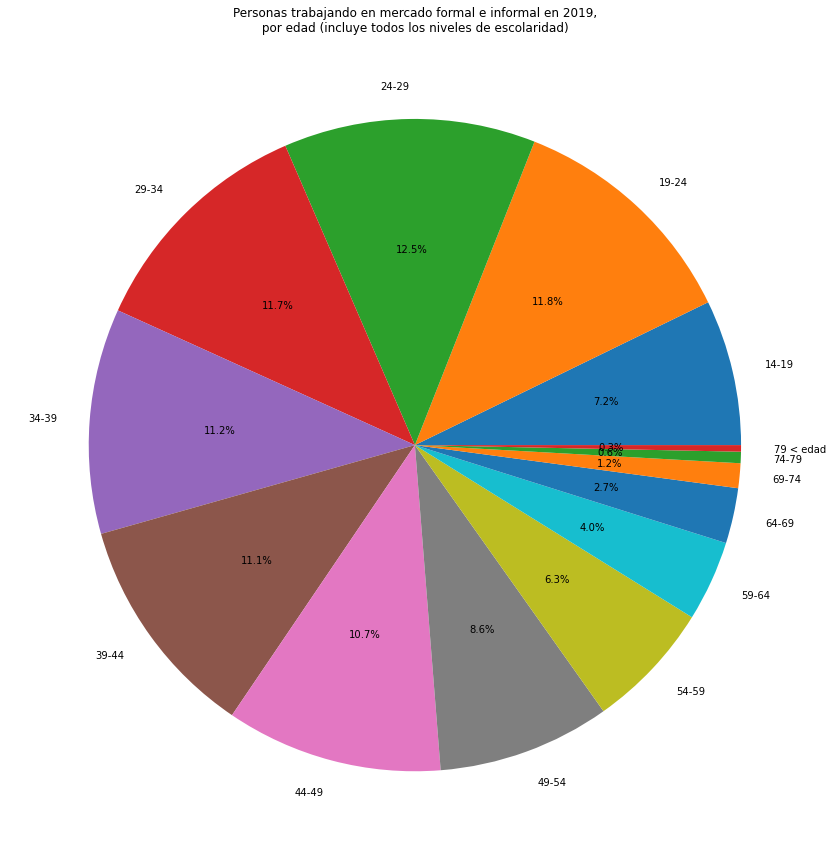

In [9]:
plt.figure(figsize=(15,15))
plt.title("Personas trabajando en mercado formal e informal en 2019,\n por edad (incluye todos los niveles de escolaridad) ")
plt.pie(pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

In [10]:
#0 nula, 1-3 basica, 4-7 medio, 8-9 superior
#mylabels = ["14-19", "19-24", "24-29", "29-34","34-39", "39-44", "44-49", "49-54","54-59", "59-64", "64-69", "69-74","74-79", "79-84", "84-89", "89-94","94-99"]
del mylabels[13]
def agrupaNivel(arr):
    x0 = []
    x1 = []
    x2 = []
    x3 = []
    s0 = 0
    s1 = 0
    s2 = 0
    s3 = 0
    s = []
    for x in arr:
        df_0 = x.loc[x['NIV'] == 0]
        df_res = x.loc[x['NIV'] > 0]
        df_1 = df_res.loc[df_res['NIV'] < 4]
        df_res = df_res.loc[df_res['NIV'] > 3]
        df_2 = df_res.loc[df_res['NIV'] < 8]
        df_res = df_res.loc[df_res['NIV'] > 7]
        df_3 = df_res
        s0 = s0 + len(df_0)
        s1 = s1 + len(df_1)
        s2 = s2 + len(df_2)
        s3 = s3 + len(df_3)
        x0.append(df_0)
        x1.append(df_1)
        x2.append(df_2)
        x3.append(df_3)
    s.append(s0)
    s.append(s1)
    s.append(s2)
    s.append(s3)
    #x0 nula, x1 basica, x2 media, x3 superior
    return x0,x1,x2,x3,s

arrNula, arrBasica, arrMedio, arrSuperior,suma = agrupaNivel(ar_grup)

In [11]:
def meanArrGrup(arr,etiqueta):
    res = []
    for x in arr:
        res.append(np.mean(x[etiqueta]))
        
    return res
def sArrGrup(arr,etiqueta):
    res = []
    for x in arr:
        y = x[etiqueta]
        n = len(y)
        m = np.mean(y)
        s = y - m
        s = np.dot(s,s)
        s = s/(n-1)
        res.append(s)
    return res

mNula = meanArrGrup(arrNula,'semanal')
mBasica = meanArrGrup(arrBasica,'semanal')
mMedio = meanArrGrup(arrMedio,'semanal')
mSuperior = meanArrGrup(arrSuperior,'semanal')
mTiempoNula = meanArrGrup(arrNula,'tot_horas')
mTiempoBasica = meanArrGrup(arrBasica,'tot_horas')
mTiempoMedio = meanArrGrup(arrMedio,'tot_horas')
mTiempoSuperior = meanArrGrup(arrSuperior,'tot_horas')

In [12]:
def imprimeLen(arr,la,m):
    cont = 0
    for x in arr:
        print(la[cont])
        print(len(x))
        print('media: ' + str(m[cont]))
        print("--------------------------------------")
        cont = cont + 1

In [13]:
def arrLen(arr):
    res = []
    for x in arr:

        res.append(len(x))
        
    return res

In [14]:
lenNula = arrLen(arrNula)
lenBasica = arrLen(arrBasica)
lenMedio = arrLen(arrMedio)
lenSuperior = arrLen(arrSuperior)
lenNula.append(sum(lenNula))
lenBasica.append(sum(lenBasica))
lenMedio.append(sum(lenMedio))
lenSuperior.append(sum(lenSuperior))
data3 = {'Nula': lenNula, 
        'Basica': lenBasica,
        'Media': lenMedio,
        'Superior': lenSuperior}
mylabels.append('tot')
df_len = pd.DataFrame(data3, index=mylabels)
df_len
del mylabels[13]
#print("Basica")
#print("total :" + str(suma[1]))
#print("--------------------------------------")
#imprimeLen(arrBasica,mylabels,mBasica)

In [15]:
#print("Media")
#print("total :" + str(suma[2]))
#print("--------------------------------------")
#imprimeLen(arrMedio,mylabels,mMedio)

In [16]:
#print("Superior")
#print("total :" + str(suma[3]))
#print("--------------------------------------")
#imprimeLen(arrSuperior,mylabels,mSuperior)

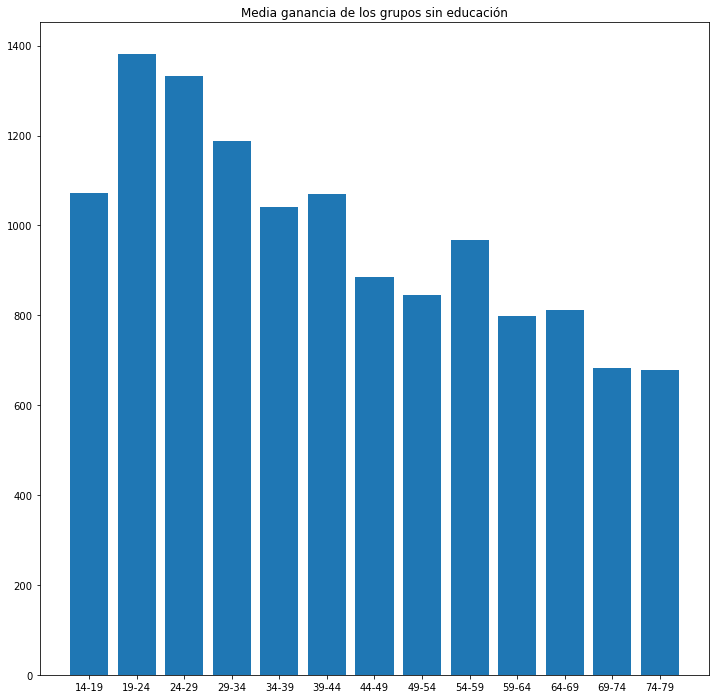

In [17]:
plt.figure(figsize=(12,12))
plt.title("Media ganancia de los grupos sin educación")
plt.bar(mylabels,mNula)
plt.show()

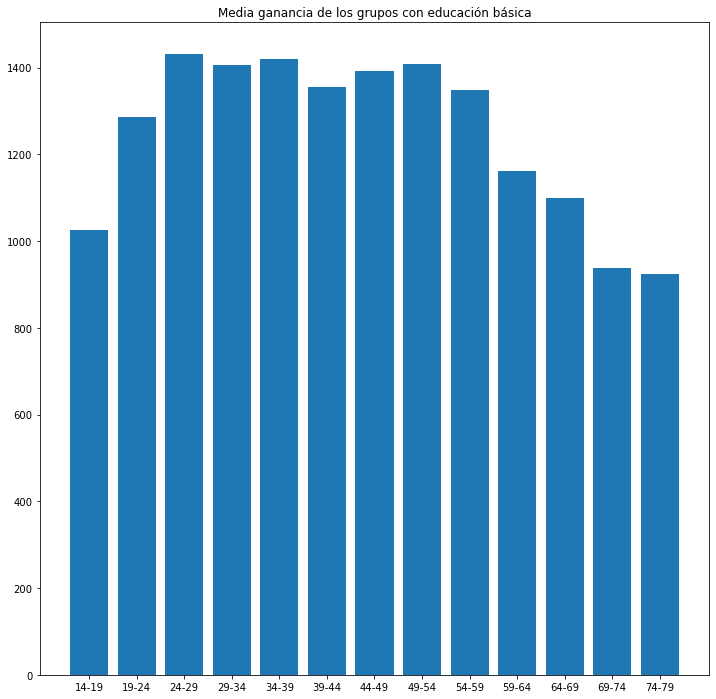

In [18]:
plt.figure(figsize=(12,12))
plt.title("Media ganancia de los grupos con educación básica")
plt.bar(mylabels,mBasica)
plt.show()

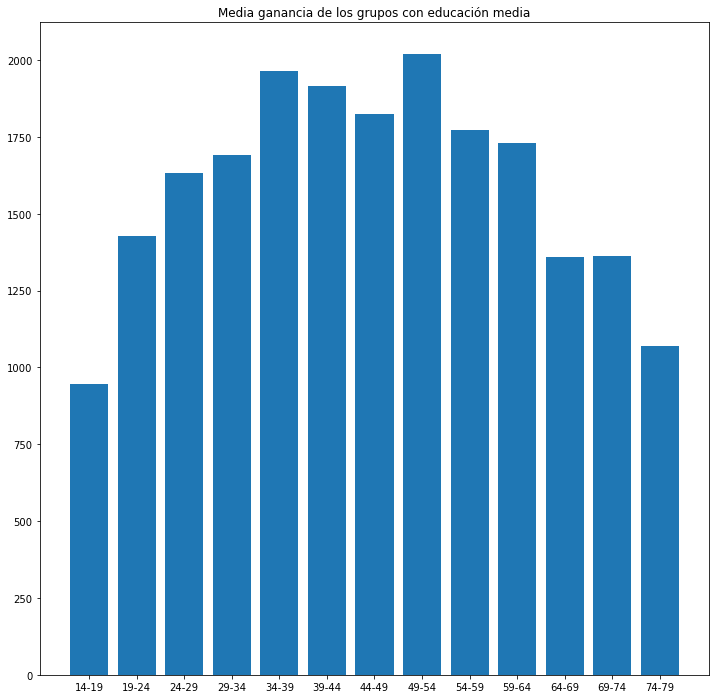

In [19]:
plt.figure(figsize=(12,12))
plt.title("Media ganancia de los grupos con educación media")
plt.bar(mylabels,mMedio)
plt.show()

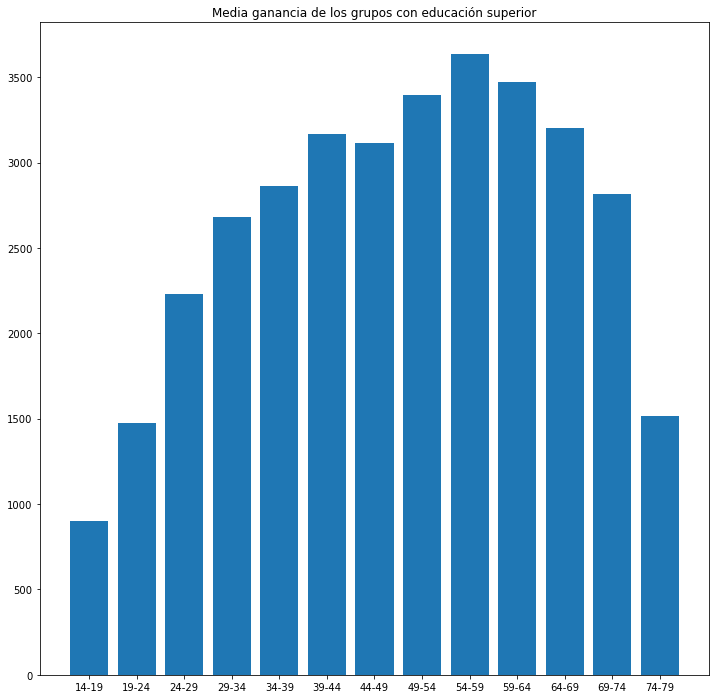

In [20]:
plt.figure(figsize=(12,12))
plt.title("Media ganancia de los grupos con educación superior")
plt.bar(mylabels,mSuperior)
plt.show()

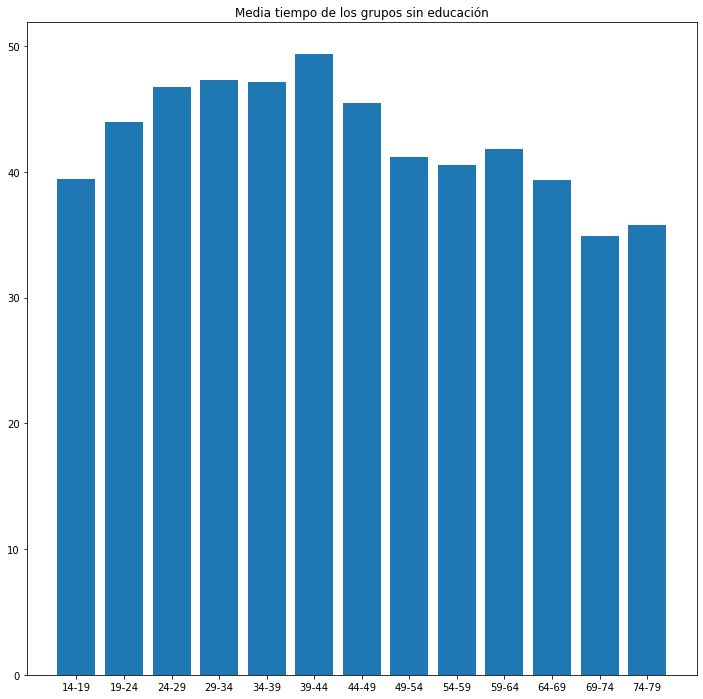

In [21]:
plt.figure(figsize=(12,12))
plt.title("Media tiempo de los grupos sin educación")
plt.bar(mylabels,mTiempoNula)
plt.show()

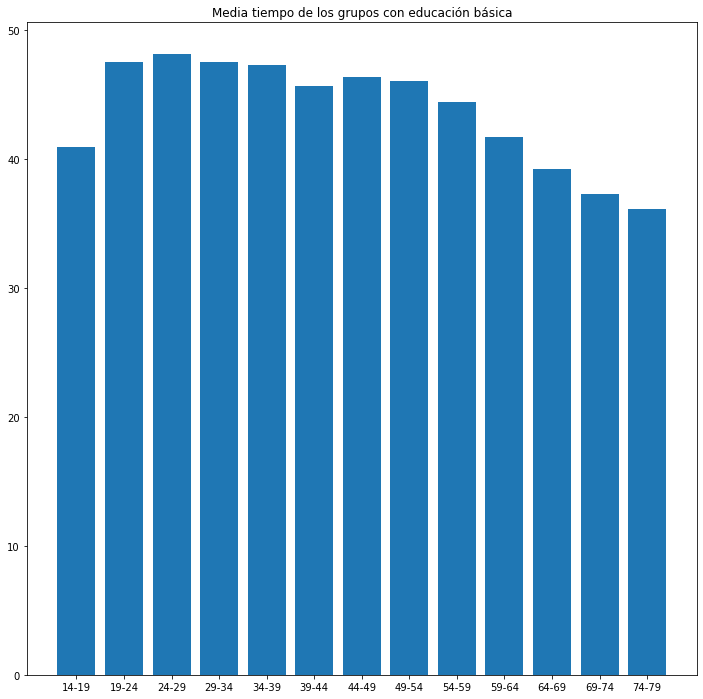

In [22]:
plt.figure(figsize=(12,12))
plt.title("Media tiempo de los grupos con educación básica")
plt.bar(mylabels,mTiempoBasica)
plt.show()

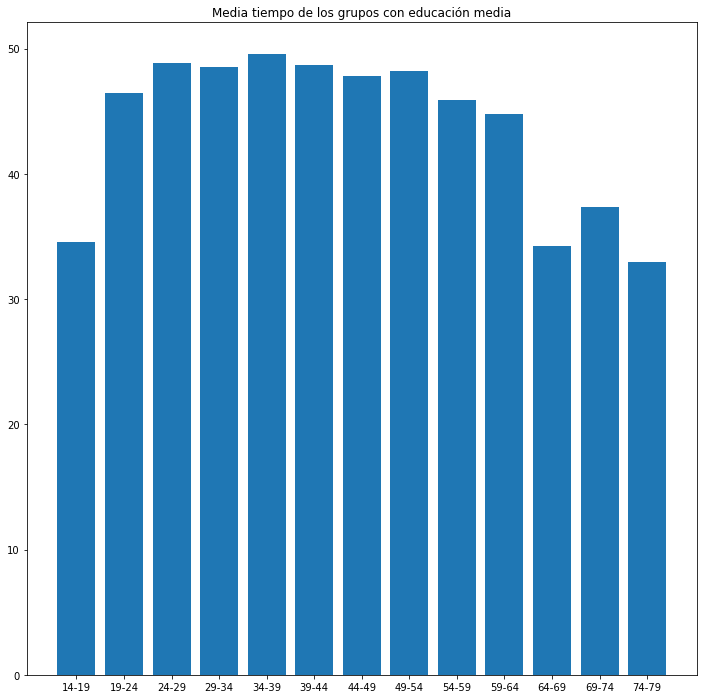

In [23]:
plt.figure(figsize=(12,12))
plt.title("Media tiempo de los grupos con educación media")
plt.bar(mylabels,mTiempoMedio)
plt.show()

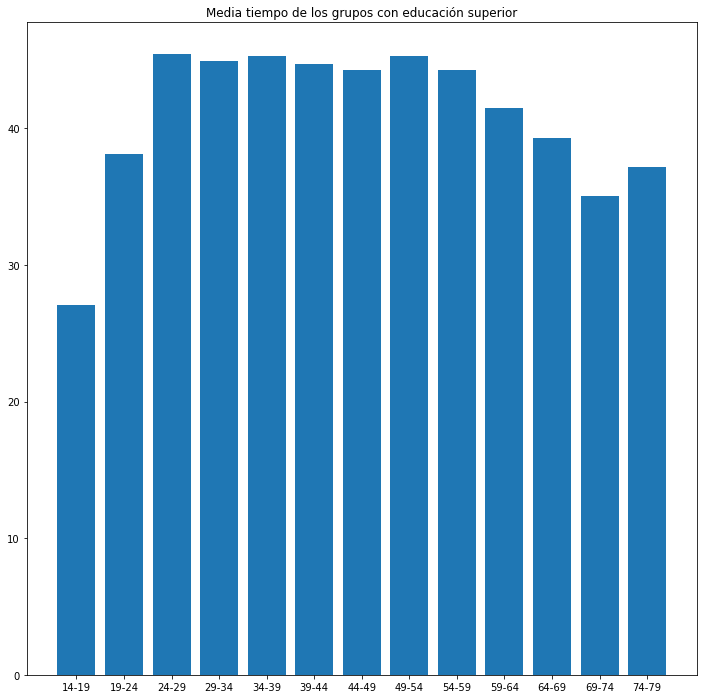

In [24]:
plt.figure(figsize=(12,12))
plt.title("Media tiempo de los grupos con educación superior")
plt.bar(mylabels,mTiempoSuperior)
plt.show()

In [25]:
mSemanalNula = meanArrGrup(arrNula,'ganancia_hora')
mSemanalBasica = meanArrGrup(arrBasica,'ganancia_hora')
mSemanalMedio = meanArrGrup(arrMedio,'ganancia_hora')
mSemanalSuperior = meanArrGrup(arrSuperior,'ganancia_hora')
sSemanalNula = sArrGrup(arrNula,'ganancia_hora')
sSemanalBasica = sArrGrup(arrBasica,'ganancia_hora')
sSemanalMedio = sArrGrup(arrMedio,'ganancia_hora')
sSemanalSuperior = sArrGrup(arrSuperior,'ganancia_hora')

arrNula[0]
print(mSemanalNula)

[40.96930551717786, 49.415712370517866, 33.84405464267276, 34.33333547986288, 29.644135649351693, 26.015833010234914, 20.767148931230775, 26.52457823162057, 27.638361143300088, 24.864288405227164, 26.373272449972813, 20.995730570814338, 23.387376227865534]


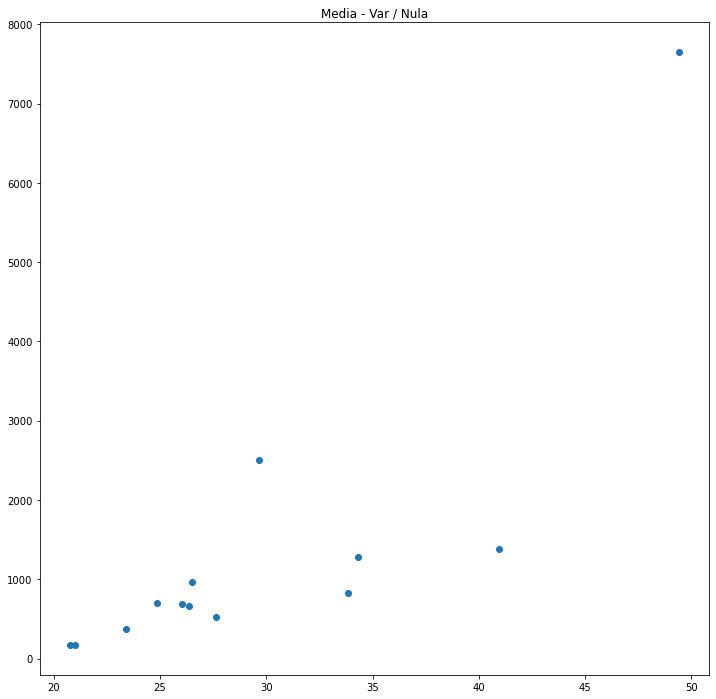

In [26]:
plt.figure(figsize=(12,12))
plt.title("Media - Var / Nula")
plt.scatter(mSemanalNula,sSemanalNula)
for i, txt in enumerate(mylabels):
    plt.annotate(txt, (sSemanalNula[i], mSemanalNula[i]))

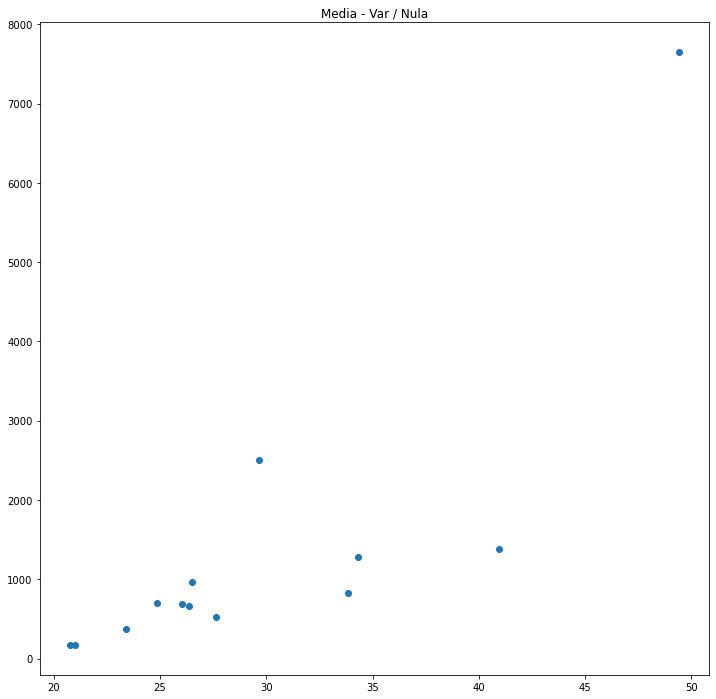

In [27]:
plt.figure(figsize=(12,12))
plt.title("Media - Var / Nula")
plt.scatter(mSemanalNula,sSemanalNula)
for i, txt in enumerate(mylabels):
    plt.annotate(txt, (sSemanalNula[i], mSemanalNula[i]))

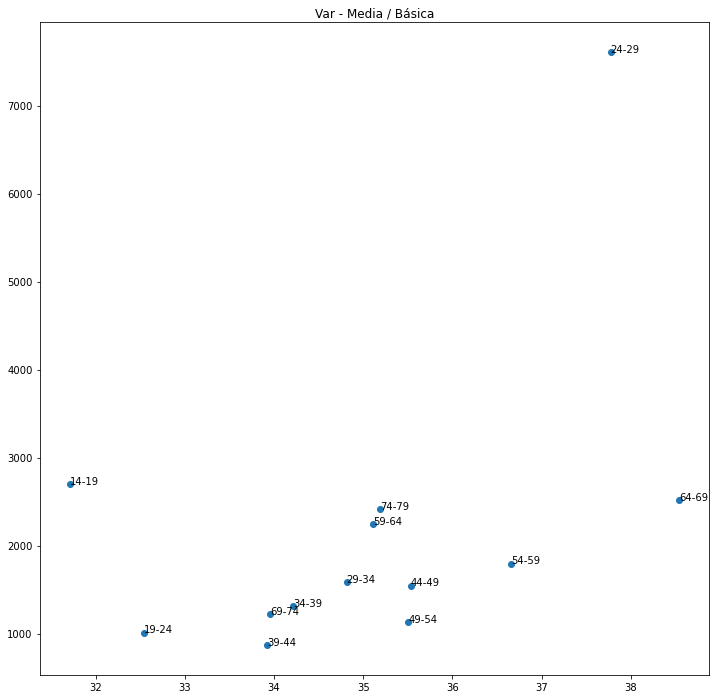

In [28]:
plt.figure(figsize=(12,12))
plt.title("Var - Media / Básica")
plt.scatter(mSemanalBasica,sSemanalBasica)
for i, txt in enumerate(mylabels):
    plt.annotate(txt, ( mSemanalBasica[i],sSemanalBasica[i]))

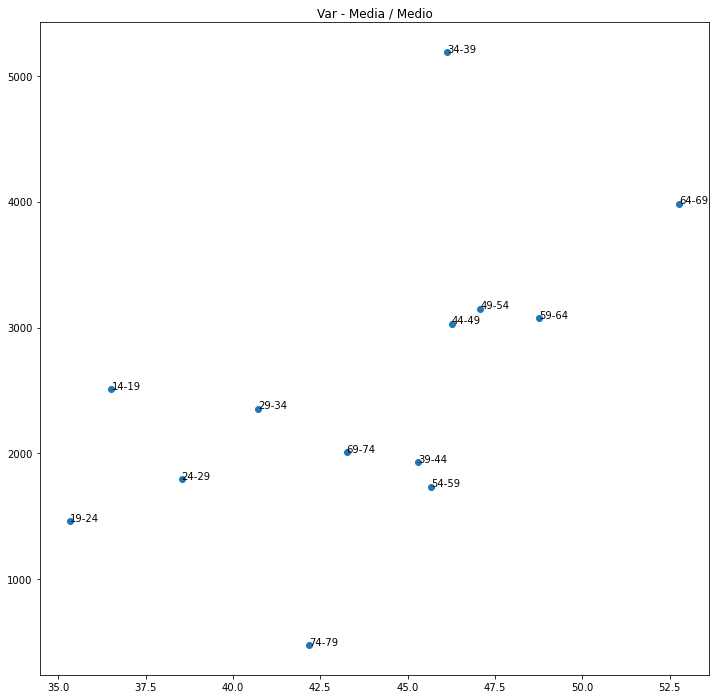

In [29]:
plt.figure(figsize=(12,12))
plt.title("Var - Media / Medio")
plt.scatter(mSemanalMedio,sSemanalMedio)
for i, txt in enumerate(mylabels):
    plt.annotate(txt, ( mSemanalMedio[i],sSemanalMedio[i]))

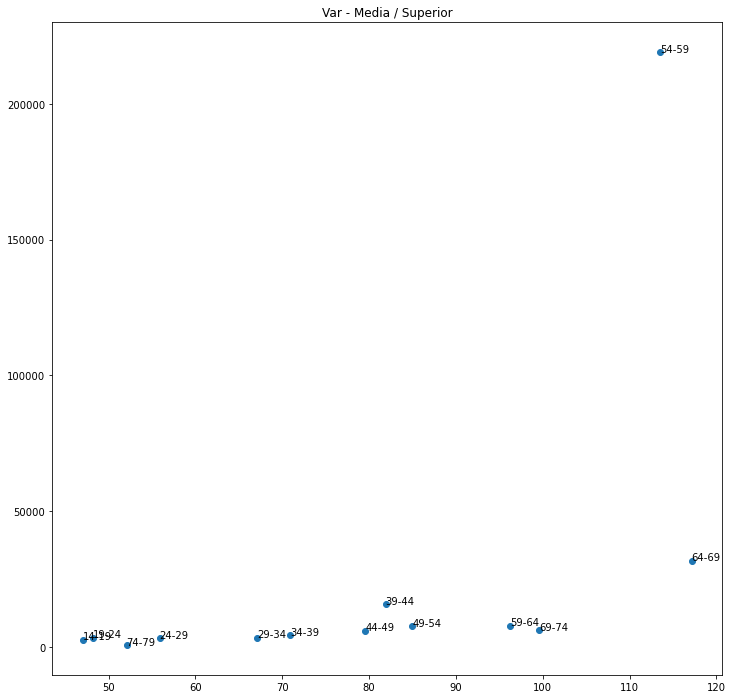

In [30]:
plt.figure(figsize=(12,12))
plt.title("Var - Media / Superior")
plt.scatter(mSemanalSuperior,sSemanalSuperior,)
for i, txt in enumerate(mylabels):
    plt.annotate(txt, ( mSemanalSuperior[i],sSemanalSuperior[i]))

In [31]:
data0 = {'Nula': mNula, 
        'Basica': mBasica,
        'Media': mMedio,
        'Superior': mSuperior}
df_medias = pd.DataFrame(data0, index=mylabels)
df_medias

,Nula,Basica,Media,Superior
14-19,1072.222222,1024.849053,946.037490,901.411290
19-24,1382.572464,1287.059543,1428.047027,1476.716621
24-29,1331.717172,1432.546116,1633.381538,2229.127785
29-34,1188.143939,1405.933877,1692.838436,2682.982415
34-39,1040.925926,1420.632303,1966.038908,2861.948403
39-44,1070.210701,1354.681509,1916.559403,3170.501872
44-49,884.665404,1391.587545,1824.454106,3113.973999
49-54,844.253472,1409.244554,2021.513477,3399.576591
54-59,968.482863,1348.814051,1774.242927,3639.537532
59-64,798.385348,1162.425780,1731.855433,3472.934089


In [32]:
data1 = {'Nula': mTiempoNula, 
        'Basica': mTiempoBasica,
        'Media': mSemanalMedio,
        'Superior': mTiempoSuperior}
df_mediasTiempo = pd.DataFrame(data1, index=mylabels)
df_mediasTiempo

,Nula,Basica,Media,Superior
14-19,39.444444,40.932665,36.524715,27.049462
19-24,44.000000,47.483647,35.343023,38.109868
24-29,46.732323,48.167776,38.536373,45.480760
29-34,47.318182,47.474629,40.729207,44.904340
34-39,47.172751,47.266864,46.134562,45.319760
39-44,49.414773,45.643247,45.307784,44.712278
44-49,45.487374,46.314045,46.272793,44.310634
49-54,41.224306,46.019600,47.079268,45.319892
54-59,40.572581,44.383507,45.673787,44.264631
59-64,41.837748,41.676625,48.764296,41.497788


In [33]:
data2 = {'Nula': mSemanalNula, 
        'Basica': mSemanalBasica,
        'Media': mTiempoMedio,
        'Superior': mSemanalSuperior}
df_mediasGananciaHora = pd.DataFrame(data2, index=mylabels)
df_mediasGananciaHora

,Nula,Basica,Media,Superior
14-19,40.969306,31.714226,34.590663,47.043113
19-24,49.415712,32.541397,46.428827,48.191277
24-29,33.844055,37.773699,48.825125,55.888215
29-34,34.333335,34.812611,48.559696,67.093085
34-39,29.644136,34.214898,49.605492,70.895236
39-44,26.015833,33.919668,48.674044,81.912644
44-49,20.767149,35.531892,47.848461,79.589722
49-54,26.524578,35.503996,48.181634,84.966034
54-59,27.638361,36.658286,45.876905,113.515024
59-64,24.864288,35.108359,44.767956,96.278293


In [34]:
#Intervalos de confianza para difenrecia de X barra
#Comprobar si exite posibilidad de que tangas var iguales
#ho -> μ = 40 horas de trabajo a la semanan las personas con al menos educacion superior
#ha -> μ > 40

In [35]:
df_universidad = df_nuevo.loc[df_nuevo['NIV'] == 8]
df_maesDoc = df_nuevo.loc[df_nuevo['NIV'] == 9]

In [36]:
df_universidad

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos,semanal,ganancia_hora
6,26,1,8,1,40,0,0,0,2.0,8000,3,40.0,0,1666.666667,41.666667
11,38,1,8,1,60,0,12,0,1.0,16708,2,72.0,0,7309.750000,101.524306
12,38,2,8,1,40,0,9,0,1.0,8000,1,49.0,0,8000.000000,163.265306
24,27,2,8,1,45,0,0,0,1.0,2400,1,45.0,0,2400.000000,53.333333
25,26,2,8,1,16,0,4,0,2.0,600,1,20.0,0,600.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70914,32,2,8,1,53,0,6,30,1.0,1500,1,59.5,30,1500.000000,25.210084
70939,42,1,8,1,45,0,9,0,1.0,1800,2,54.0,0,787.500000,14.583333
71204,29,1,8,1,12,0,2,0,NaN,1000,1,14.0,0,1000.000000,71.428571
71310,39,1,8,1,40,0,0,0,1.0,5000,2,40.0,0,2187.500000,54.687500


In [37]:
df_maesDoc

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos,semanal,ganancia_hora
26,35,1,9,1,50,0,0,0,1.0,5000,2,50.0,0,2187.500000,43.750000
76,29,2,9,1,40,0,0,0,1.0,4000,2,40.0,0,1750.000000,43.750000
114,29,1,9,1,40,0,4,0,1.0,3500,2,44.0,0,1531.250000,34.801136
123,47,1,9,1,45,0,0,0,1.0,18000,3,45.0,0,3750.000000,83.333333
161,30,1,9,1,40,0,0,0,1.0,16000,3,40.0,0,3333.333333,83.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70185,56,1,9,1,25,0,5,0,NaN,1000,1,30.0,0,1000.000000,33.333333
70343,33,1,9,1,30,0,0,0,1.0,3500,1,30.0,0,3500.000000,116.666667
70364,47,1,9,1,40,0,4,0,1.0,5000,2,44.0,0,2187.500000,49.715909
70434,35,1,9,1,45,0,0,0,1.0,5500,2,45.0,0,2406.250000,53.472222


In [38]:
mediaUniversidad = np.mean(df_universidad['ganancia_hora'])
mediaMaesDoc = np.mean(df_maesDoc['ganancia_hora'])
print(mediaUniversidad)
print(mediaMaesDoc)

67.05541330364693
100.68387445860152


In [39]:
def intervaloDeConfDifMedias(x_barra, y_barra,nx,ny,s2x,s2y,alfa):
    res = []
    sp2 = ((nx-1)*(s2x) + (ny-1)*(s2y))/(nx+ny-2)
    sp = pow(sp2,1/2)
    dif = x_barra - y_barra
    grados_de_libertad = (nx+ny-2)
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    res.append(dif-res_t*sp*(pow((1/nx)+(1/ny),1/2)))
    res.append(dif+res_t*sp*(pow((1/nx)+(1/ny),1/2)))
    
    return res

In [64]:
x = [df_universidad]
y = [df_maesDoc]
s2X  = sArrGrup(x,'semanal')
s2Y = sArrGrup(y,'semanal')
intervalo_dif_medias = intervaloDeConfDifMedias(mediaUniversidad, mediaMaesDoc,len(df_universidad),len(df_maesDoc),s2X[0],s2Y[0],.1)

In [65]:
intervalo_dif_medias

[-178.69978212898502, 111.44285981907582]

In [42]:
len(df_universidad)

7049

In [43]:
x_b = 135
y_b = 122
s2x = 15 * 15
s2y = 10 * 10
nx = 20
ny = 20
res = intervaloDeConfDifMedias(x_b, y_b,nx,ny,s2x,s2y,0.05)

In [44]:
print(res)

[4.839406230521869, 21.160593769478133]


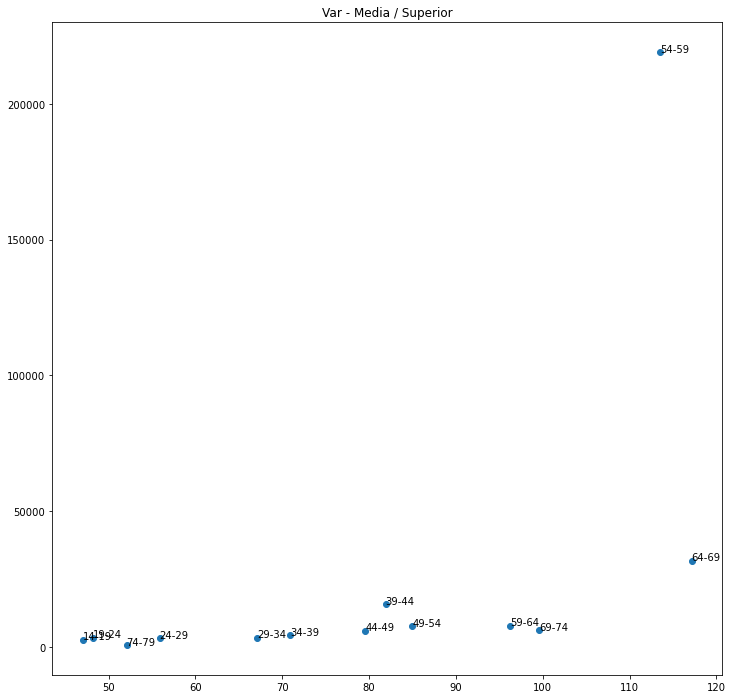

In [45]:
plt.figure(figsize=(12,12))
plt.title("Var - Media / Superior")
plt.scatter(mSemanalSuperior,sSemanalSuperior,)
for i, txt in enumerate(mylabels):
    plt.annotate(txt, ( mSemanalSuperior[i],sSemanalSuperior[i]))

In [46]:
mSemanalSuperior

[47.04311341469605,
 48.191276520168195,
 55.88821524936239,
 67.09308505524189,
 70.89523601045607,
 81.91264366671531,
 79.58972157460961,
 84.96603427613312,
 113.51502383584321,
 96.27829264186751,
 117.15184498676062,
 99.59118348534469,
 52.06845238095239]

In [47]:
sSemanalSuperior

[2750.4488862401226,
 3421.601704378598,
 3406.897883183117,
 3487.7681442452413,
 4315.359051454793,
 15677.214253650149,
 6060.734368163316,
 7574.430074591076,
 219069.70959557057,
 7903.6149658481645,
 31838.829049763248,
 6144.918612523292,
 695.9956508645125]

In [48]:
del sSemanalSuperior[5]
del sSemanalSuperior[7]
del sSemanalSuperior[8]
del mSemanalSuperior[5]
del mSemanalSuperior[7]
del mSemanalSuperior[8]
del mylabels[5]
del mylabels[7]
del mylabels[8]


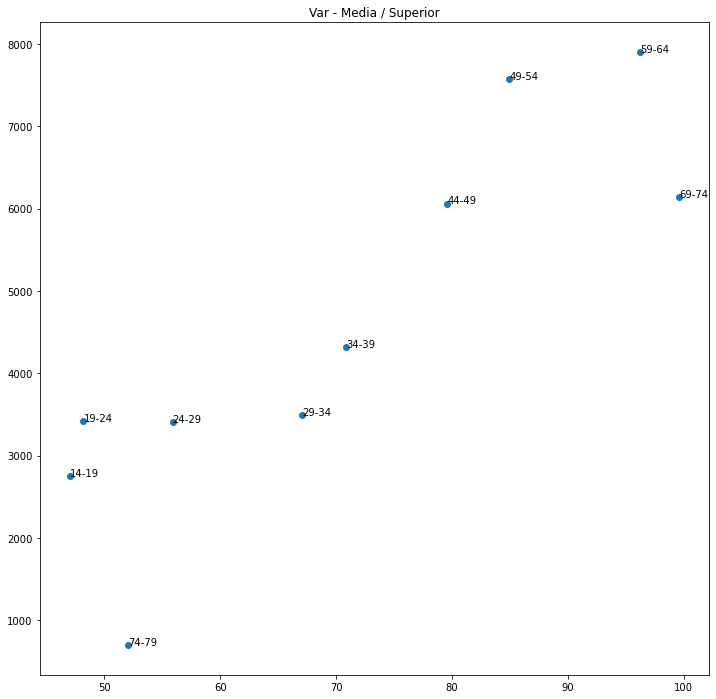

In [49]:
plt.figure(figsize=(12,12))
plt.title("Var - Media / Superior")
plt.scatter(mSemanalSuperior,sSemanalSuperior,)
for i, txt in enumerate(mylabels):
    plt.annotate(txt, ( mSemanalSuperior[i],sSemanalSuperior[i]))

In [50]:
mSemanalSuperior

[47.04311341469605,
 48.191276520168195,
 55.88821524936239,
 67.09308505524189,
 70.89523601045607,
 79.58972157460961,
 84.96603427613312,
 96.27829264186751,
 99.59118348534469,
 52.06845238095239]

In [51]:
sSemanalSuperior

[2750.4488862401226,
 3421.601704378598,
 3406.897883183117,
 3487.7681442452413,
 4315.359051454793,
 6060.734368163316,
 7574.430074591076,
 7903.6149658481645,
 6144.918612523292,
 695.9956508645125]

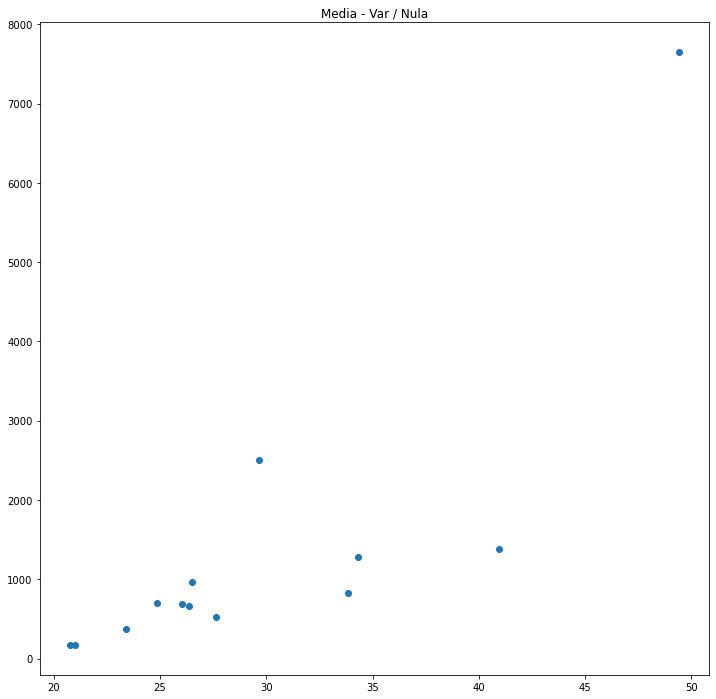

In [52]:
plt.figure(figsize=(12,12))
plt.title("Media - Var / Nula")
plt.scatter(mSemanalNula,sSemanalNula)
for i, txt in enumerate(mylabels):
    plt.annotate(txt, (sSemanalNula[i], mSemanalNula[i]))

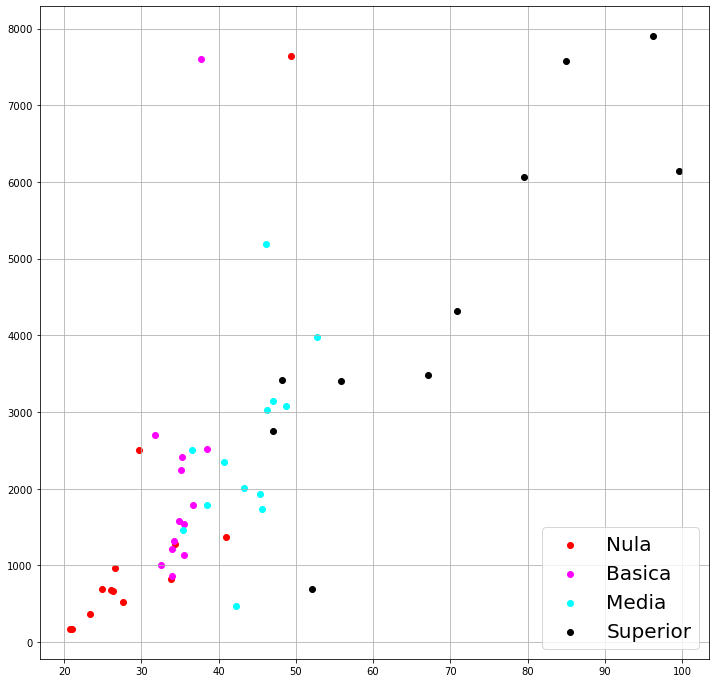

In [53]:
legends = ['Nula','Basica','Media','Superior']
plt.figure(figsize=(12,12))
plt.scatter(mSemanalNula,sSemanalNula,color='red')
plt.scatter(mSemanalBasica,sSemanalBasica, color='magenta')
plt.scatter(mSemanalMedio,sSemanalMedio, color='cyan')
plt.scatter(mSemanalSuperior,sSemanalSuperior, color='black')
#for i, txt in enumerate(mylabels):
#    plt.annotate(txt, (mSemanalNula[i],sSemanalNula[i]))
#    plt.annotate(txt, (mSemanalBasica[i], sSemanalBasica[i]))
#    plt.annotate(txt, (mSemanalMedio[i], sSemanalMedio[i]))
#for i, txt in enumerate(mylabelsSup):
#    plt.annotate(txt, (mSemanalSuperior[i], sSemanalSuperior[i]))
plt.legend(legends, fontsize="20")
plt.grid(True)

In [54]:
df_hombres = df_nuevo.loc[df_nuevo['SEXO'] == 1]
df_mujeres = df_nuevo.loc[df_nuevo['SEXO'] == 2]

In [55]:
df_hombres

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos,semanal,ganancia_hora
2,30,1,6,1,40,0,20,0,1.0,8300,3,60.0,0,1729.166667,28.819444
3,25,1,3,1,55,0,0,0,1.0,4000,2,55.0,0,1750.000000,31.818182
6,26,1,8,1,40,0,0,0,2.0,8000,3,40.0,0,1666.666667,41.666667
9,50,1,2,1,55,0,0,0,2.0,900,1,55.0,0,900.000000,16.363636
11,38,1,8,1,60,0,12,0,1.0,16708,2,72.0,0,7309.750000,101.524306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71385,17,1,6,1,30,0,8,0,2.0,1000,1,38.0,0,1000.000000,26.315789
71386,46,1,6,1,40,0,8,0,2.0,2100,1,48.0,0,2100.000000,43.750000
71388,34,1,3,1,40,0,4,0,1.0,4000,2,44.0,0,1750.000000,39.772727
71400,31,1,8,1,60,0,24,0,1.0,15000,3,84.0,0,3125.000000,37.202381


In [56]:
df_mujeres

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos,semanal,ganancia_hora
5,48,2,7,1,40,0,5,0,2.0,6000,3,45.0,0,1250.0,27.777778
12,38,2,8,1,40,0,9,0,1.0,8000,1,49.0,0,8000.0,163.265306
22,57,2,2,1,20,0,0,0,NaN,1000,1,20.0,0,1000.0,50.000000
24,27,2,8,1,45,0,0,0,1.0,2400,1,45.0,0,2400.0,53.333333
25,26,2,8,1,16,0,4,0,2.0,600,1,20.0,0,600.0,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71389,31,2,3,1,5,0,1,0,2.0,900,1,6.0,0,900.0,150.000000
71394,47,2,3,1,8,0,0,0,NaN,500,1,8.0,0,500.0,62.500000
71397,44,2,3,1,25,0,0,0,2.0,400,1,25.0,0,400.0,16.000000
71401,23,2,6,1,40,0,8,0,2.0,2400,1,48.0,0,2400.0,50.000000


In [57]:
df_hombres_formal = df_hombres.loc[df_hombres['P5_6_6'] == 1.0]
df_hombres_informal = df_hombres.loc[df_hombres['P5_6_6'] == 2.0]
df_mujeres_formal = df_mujeres.loc[df_mujeres['P5_6_6'] == 1.0]
df_mujeres_informal = df_mujeres.loc[df_mujeres['P5_6_6'] == 2.0]

In [58]:
print(len(df_hombres_formal))
print(len(df_hombres_informal))
print(len(df_mujeres_formal))
print(len(df_mujeres_informal))

8578
7684
5979
5066


In [59]:
tot_hombres_mujeres = len(df_hombres_formal) + len(df_hombres_informal) + len(df_mujeres_formal) + len(df_mujeres_informal)
print(tot_hombres_mujeres)

27307


In [60]:
porcen_hombres_formal = len(df_hombres_formal) / tot_hombres_mujeres
porcen_hombres_informal = len(df_hombres_informal) / tot_hombres_mujeres
porcen_mujeres_formal = len(df_mujeres_formal) / tot_hombres_mujeres
porcen_mujeres_informal = len(df_mujeres_informal) / tot_hombres_mujeres

In [61]:
print(porcen_hombres_formal)
print(porcen_hombres_informal)
print(porcen_mujeres_formal)
print(porcen_mujeres_informal)

0.31413190756948767
0.2813930494012524
0.21895484674259347
0.1855201962866664


In [62]:
m_horas_hombres_formal = np.mean(df_hombres_formal['tot_horas'])
m_horas_hombres_informal = np.mean(df_hombres_informal['tot_horas'])
m_horas_mujeres_formal = np.mean(df_mujeres_formal['tot_horas'])
m_horas_mujeres_informal = np.mean(df_mujeres_informal['tot_horas'])

In [66]:
print(m_horas_hombres_formal)
print(m_horas_hombres_informal)
print(m_horas_mujeres_formal)
print(m_horas_mujeres_informal)

51.961801507732964
46.98659552316501
45.33587835200982
36.558020792209504


In [67]:
m_ganancia_hora_hombres_formal = np.mean(df_hombres_formal['ganancia_hora'])
m_ganancia_hora_hombres_informal = np.mean(df_hombres_informal['ganancia_hora'])
m_ganancia_hora_mujeres_formal = np.mean(df_mujeres_formal['ganancia_hora'])
m_ganancia_hora_mujeres_informal = np.mean(df_mujeres_informal['ganancia_hora'])

In [68]:
print(m_ganancia_hora_hombres_formal)
print(m_ganancia_hora_hombres_informal)
print(m_ganancia_hora_mujeres_formal)
print(m_ganancia_hora_mujeres_informal)

48.715671145318915
33.70543591471965
46.53038837314561
33.71602094944747
